In [1]:
# In this version of the ensemble mean, we take the calculate longest days and then take the mean

In [2]:
#import statements
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib import colorbar
import matplotlib.transforms as transforms
#import cmocean
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#import os #Double check in a bit for the timeseries, average file
import math
import cmocean
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [3]:
sim='001'
freezing = 273.1

In [4]:
def return_longest_continuous_days(array,start_index,end_index):
    #time, lat lon
    longest_days = np.zeros([192,288])
    continuous = np.zeros([192,288])
    current_streak=np.zeros([192,288])


    for time in range(start_index,end_index):#len(ts['TS'].shape[0])):
        #go through lat
        if time%100 == 0:
            print("        ",time)
        for lat in range(0,192):
            #go through lon
            for lon in range(0,288):
                #if it is below freezing
                if math.isnan(array[time,lat,lon]) == False: #check that it is not nan
                    if array[time,lat,lon] < freezing:
                        #if it is continuous,
                        if continuous[lat,lon] == 1:
                            #to that point +=1
                            current_streak[lat,lon] +=1

                        #if it is not continuous: 
                        elif continuous[lat,lon] == 0:
                            #set continous to true
                            continuous[lat,lon] = 1
                            #+=1 to current streak
                            current_streak[lat,lon] = 1
                    else:
                        current_streak[lat,lon] = 0
                        continuous[lat,lon] = 0
                            #turn continous to false
                else:
                    longest_days[lat,lon] =np.nan
                if current_streak[lat,lon] > longest_days[lat,lon] and current_streak[lat,lon] !=1:
                        longest_days[lat,lon] = current_streak[lat,lon]

    return longest_days

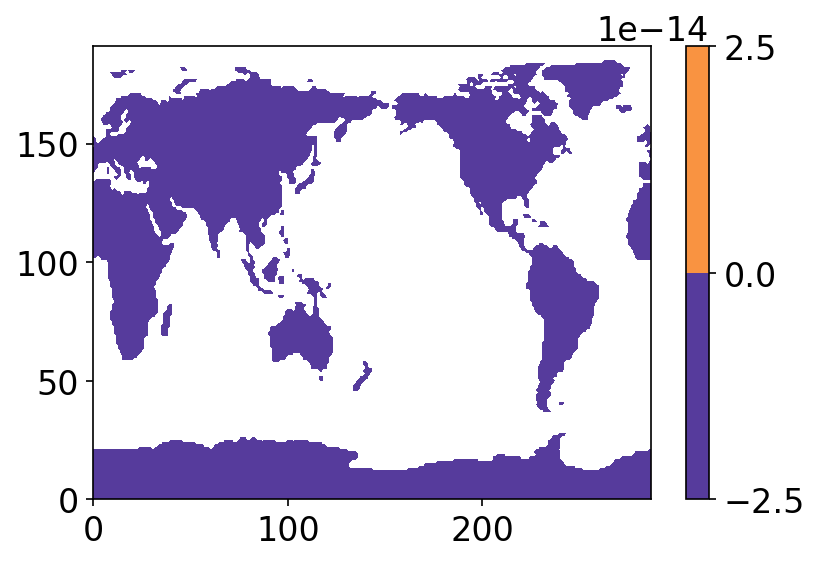

In [5]:
#import ocean in order to isolate the land
ocean_data = '/glade/work/vgarza/arise_regrid/arise_20350101-20691231.nc'
ocean = xr.open_dataset(ocean_data)

cmap = cmocean.cm.thermal
land_data = np.zeros([ocean['SST'][0].shape[0],ocean['SST'][0].shape[1]])
land_data[:] = np.nan
land_data[np.isnan(ocean['SST'][0])== True] = 0

p = plt.contourf(land_data,cmap=cmap)
plt.colorbar(p)

In [16]:
ts = {}
ts['001','002','003','004','005','006','007','008','009','010'] ={}

cesm={}
cesm['001','002','003','004','005','006','007','008','009','010'] ={}

cesm_2015={}
cesm_2015['001','002','003','004','005','006','007','008','009','010'] ={}

sim_array = ['001','002','003','004','005','006','007','008','009','010'] 

#ts_data = []
#cesm__35_69_data=[]
#cesm_2015_data = []

arise_2069_longest_days = []
cesm_2069_longest_days = []
cesm_2015_longest_days = []

## CUt is so its only 2035 - 2069
for sim in sim_array: 
    print(sim)
    print('     Opening TS: ', sim)
    path = '/glade/campaign/cesm/collections/ARISE-SAI-1.5/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'+sim+'/atm/proc/tseries/day_1/'
    dataFile = xr.open_mfdataset(path+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'+sim+'.cam.h1.TS.*' + '.nc')
    
    ts = np.array(dataFile['TS'][0:12775,:,:]-land_data)
    
    print('     Opening CESM: ', sim)
    path = '/glade/campaign/cesm/collections/CESM2-WACCM-SSP245/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'+sim+'/atm/proc/tseries/day_1/'
    dataFile = xr.open_mfdataset(path+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'+sim+'.cam.h1.TS.*'+'.nc')
    
    cesm = np.array(dataFile['TS'][20*365:54*365+365,:,:]-land_data) #get 2035-2069)
    cesm_2015 = np.array(dataFile['TS'][0:365,:,:]-land_data) #gets just 2015

    print('     Calculate Longest Days')
    #Calculate the longest days
    arise_2069_longest_days.append(return_longest_continuous_days(ts,34*365,34*365+365))
    cesm_2069_longest_days.append(return_longest_continuous_days(cesm,34*365,34*365+365))
    cesm_2015_longest_days.append(return_longest_continuous_days(cesm_2015,0,365))

001
     Opening TS:  001
     Opening CESM:  001
     Calculate Longest Days
         12500
         12600
         12700
         12500
         12600
         12700
         0
         100
         200
         300
002
     Opening TS:  002
     Opening CESM:  002
     Calculate Longest Days
         12500
         12600
         12700
         12500
         12600
         12700
         0
         100
         200
         300
003
     Opening TS:  003
     Opening CESM:  003
     Calculate Longest Days
         12500
         12600
         12700
         12500
         12600
         12700
         0
         100
         200
         300
004
     Opening TS:  004
     Opening CESM:  004
     Calculate Longest Days
         12500
         12600
         12700
         12500
         12600
         12700
         0
         100
         200
         300
005
     Opening TS:  005
     Opening CESM:  005
     Calculate Longest Days
         12500
         12600
         12700
     

In [17]:

arise_2069_longest_days_mean = np.mean(np.array(arise_2069_longest_days),axis = 0)
cesm_2069_longest_days_mean = np.mean(np.array(cesm_2069_longest_days),axis = 0)
cesm_2015_longest_days_mean = np.mean(np.array(cesm_2015_longest_days),axis = 0)

In [21]:
arise_ts_2069_longest_days, lon = add_cyclic_point(arise_2069_longest_days_mean, coord=dataFile['lon'])
cesm_ts_2069_longest_days, lon = add_cyclic_point(cesm_2069_longest_days_mean, coord=dataFile['lon'])
cesm_ts_2015_longest_days, lon = add_cyclic_point(cesm_2015_longest_days_mean, coord=dataFile['lon'])

In [22]:
NA_levs = np.arange(0,135,10)
levels=np.arange(0,155,15)

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


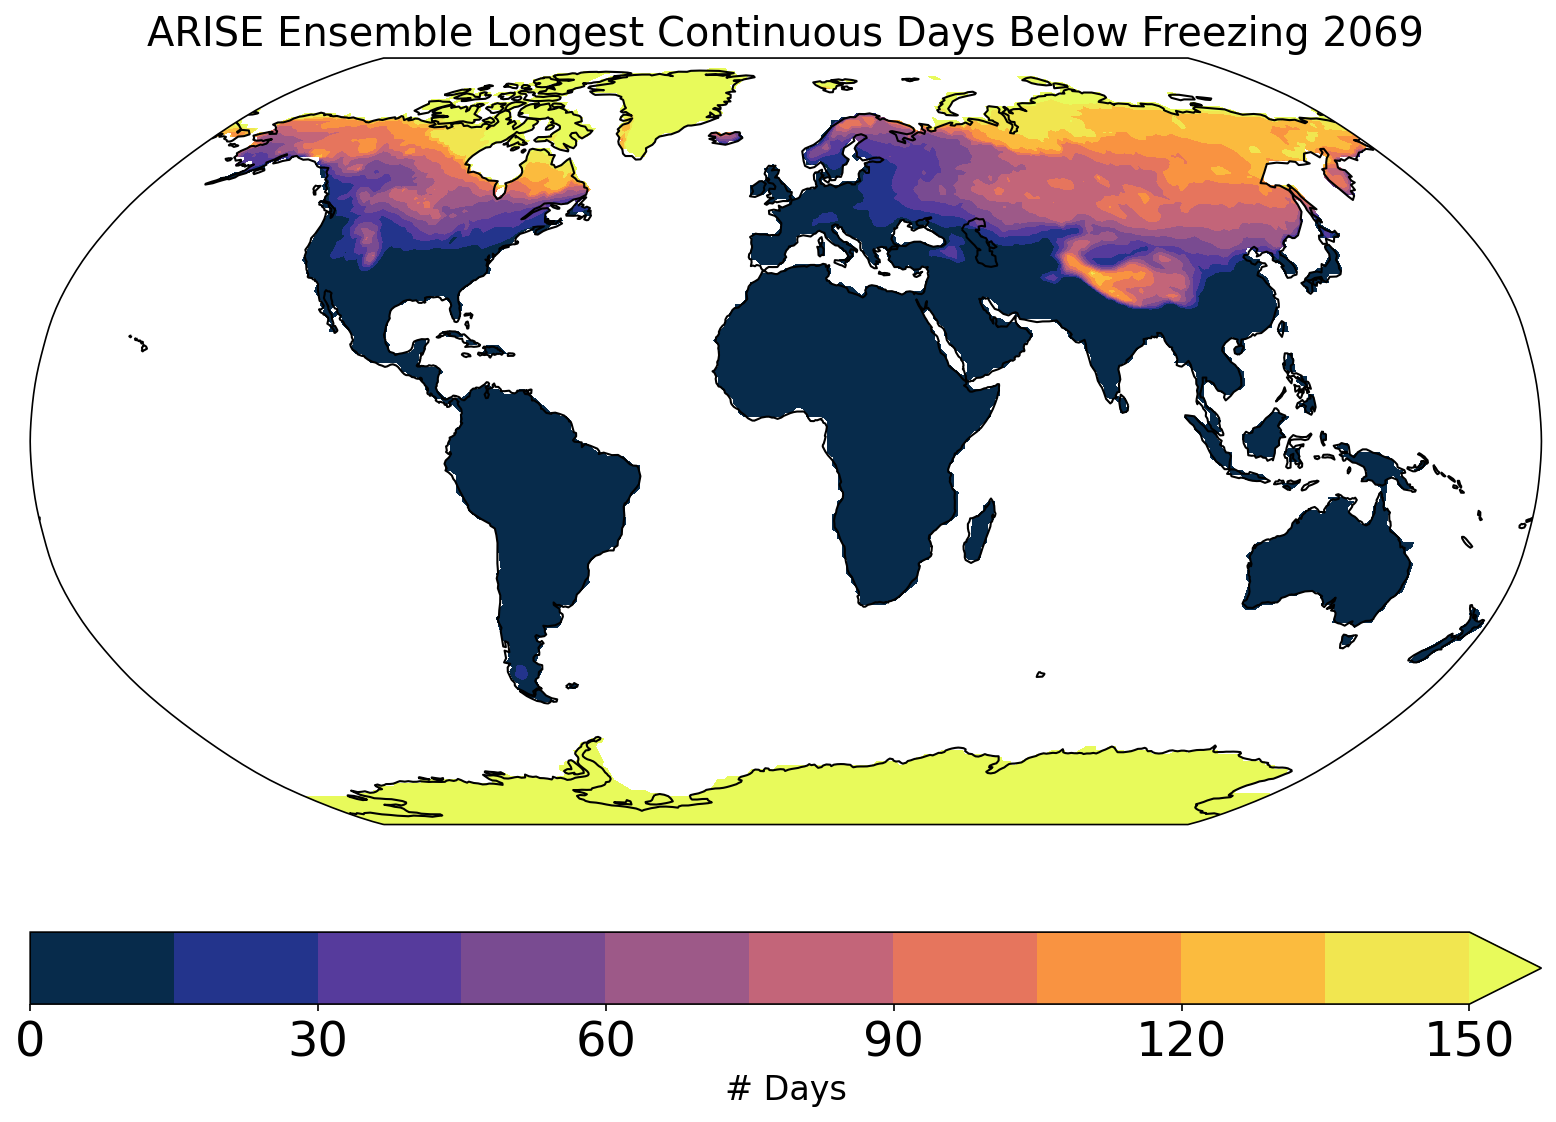

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


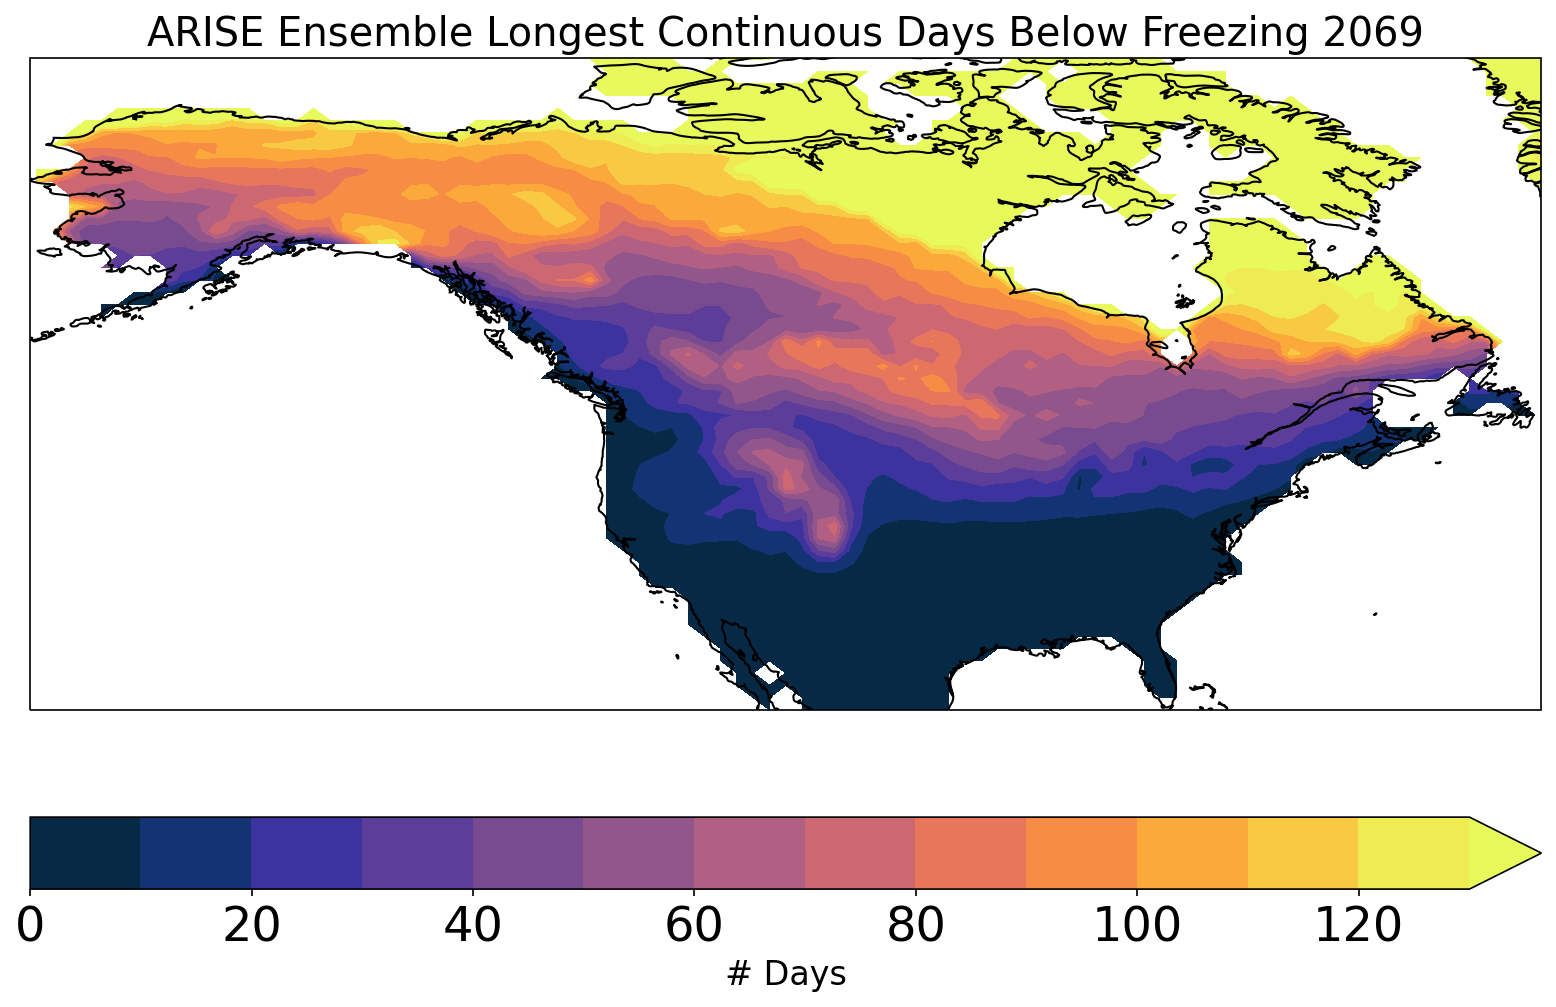

In [23]:
##Plotting: Arise 2069, longest days below freezing,global
x = lon
y = dataFile['lat']
plot = arise_ts_2069_longest_days


fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0))) # defining a figure
title = 'ARISE Ensemble Longest Continuous Days Below Freezing 2069'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_global()  

#plot the data
p = ax.contourf(x, y,
                plot,levels,extend='max',
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal)

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend='max') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('# Days')

plt.show() 
plt.close()

#################################################################################################################################
#################################################################################################################################
#Plotting Arise, 2069, North America
x = lon
y = dataFile['lat']
plot = arise_ts_2069_longest_days

fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.PlateCarree())) # defining a figure
title = 'ARISE Ensemble Longest Continuous Days Below Freezing 2069'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline

ax.set_extent([-168,-52,25,75],crs=ccrs.PlateCarree() ) 

#plot the data
p = ax.contourf(x, y,
                plot,NA_levs,extend='max', #plot the surface
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal)

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend='max') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('# Days')

plt.show() 
plt.close()

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


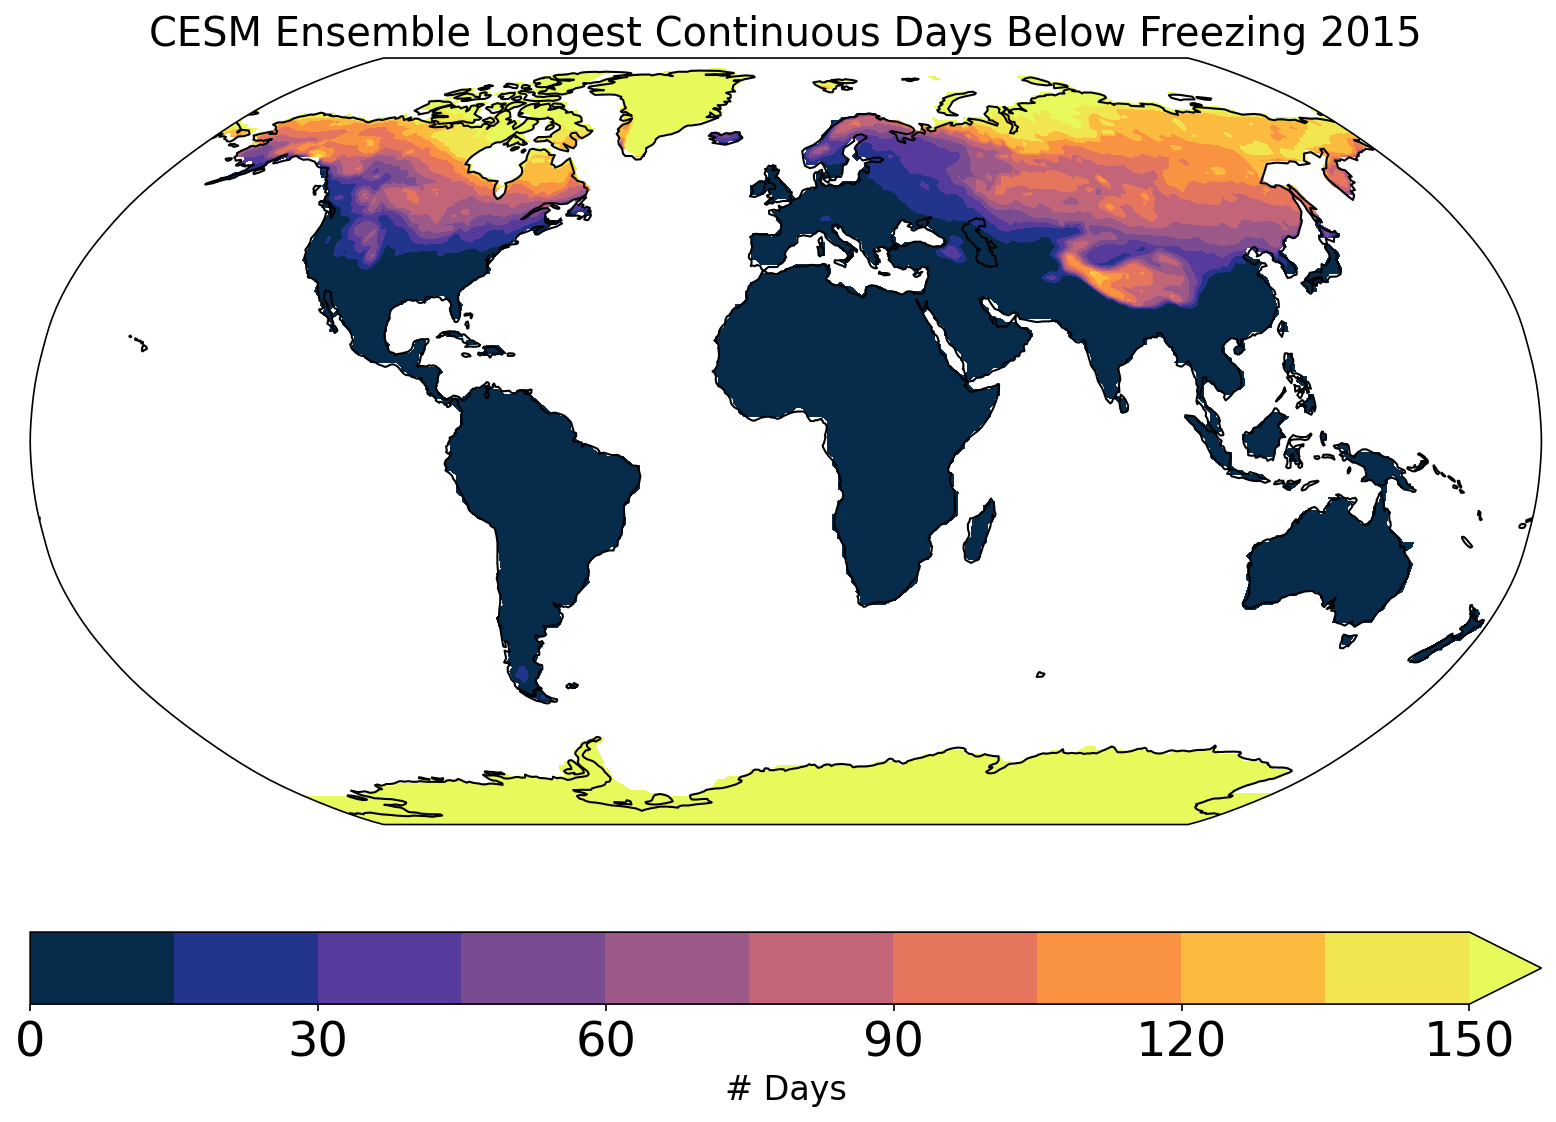

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


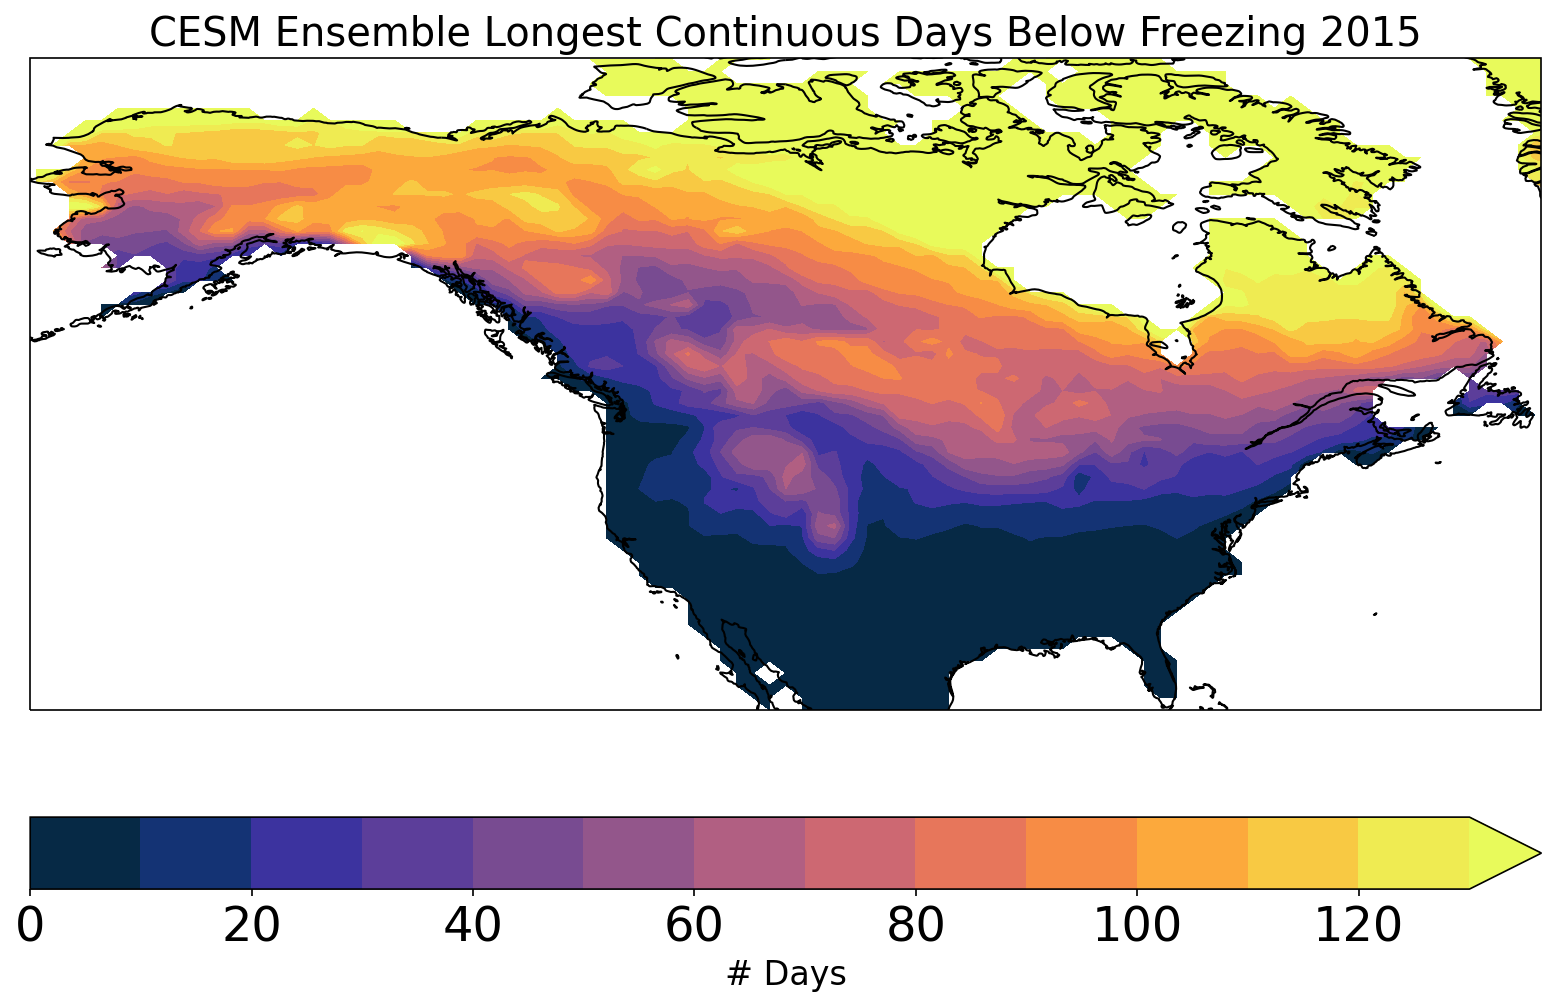

In [24]:
#Plotting: CESM 2015, longest days below freezing, global
x = lon
y = dataFile['lat']
plot = cesm_ts_2015_longest_days


fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0))) # defining a figure
title = 'CESM Ensemble Longest Continuous Days Below Freezing 2015'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_global()  

#plot the data
p = ax.contourf(x, y,
                plot,levels,extend='max', #plot the surface
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal)

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend = 'max') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('# Days')


plt.show() 
plt.close()

##################################################################################################################################
##################################################################################################################################
#Plotting: Cesm 2015, North America
x = lon
y = dataFile['lat']
plot =cesm_ts_2015_longest_days


fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0))) # defining a figure
title = 'CESM Ensemble Longest Continuous Days Below Freezing 2015'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_extent([-168,-52,25,75],crs=ccrs.PlateCarree() ) 

#plot the data
p = ax.contourf(x, y,
                plot,NA_levs,extend='max', #plot the surface
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal)

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend = 'max') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('# Days')


plt.show() 
plt.close()

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


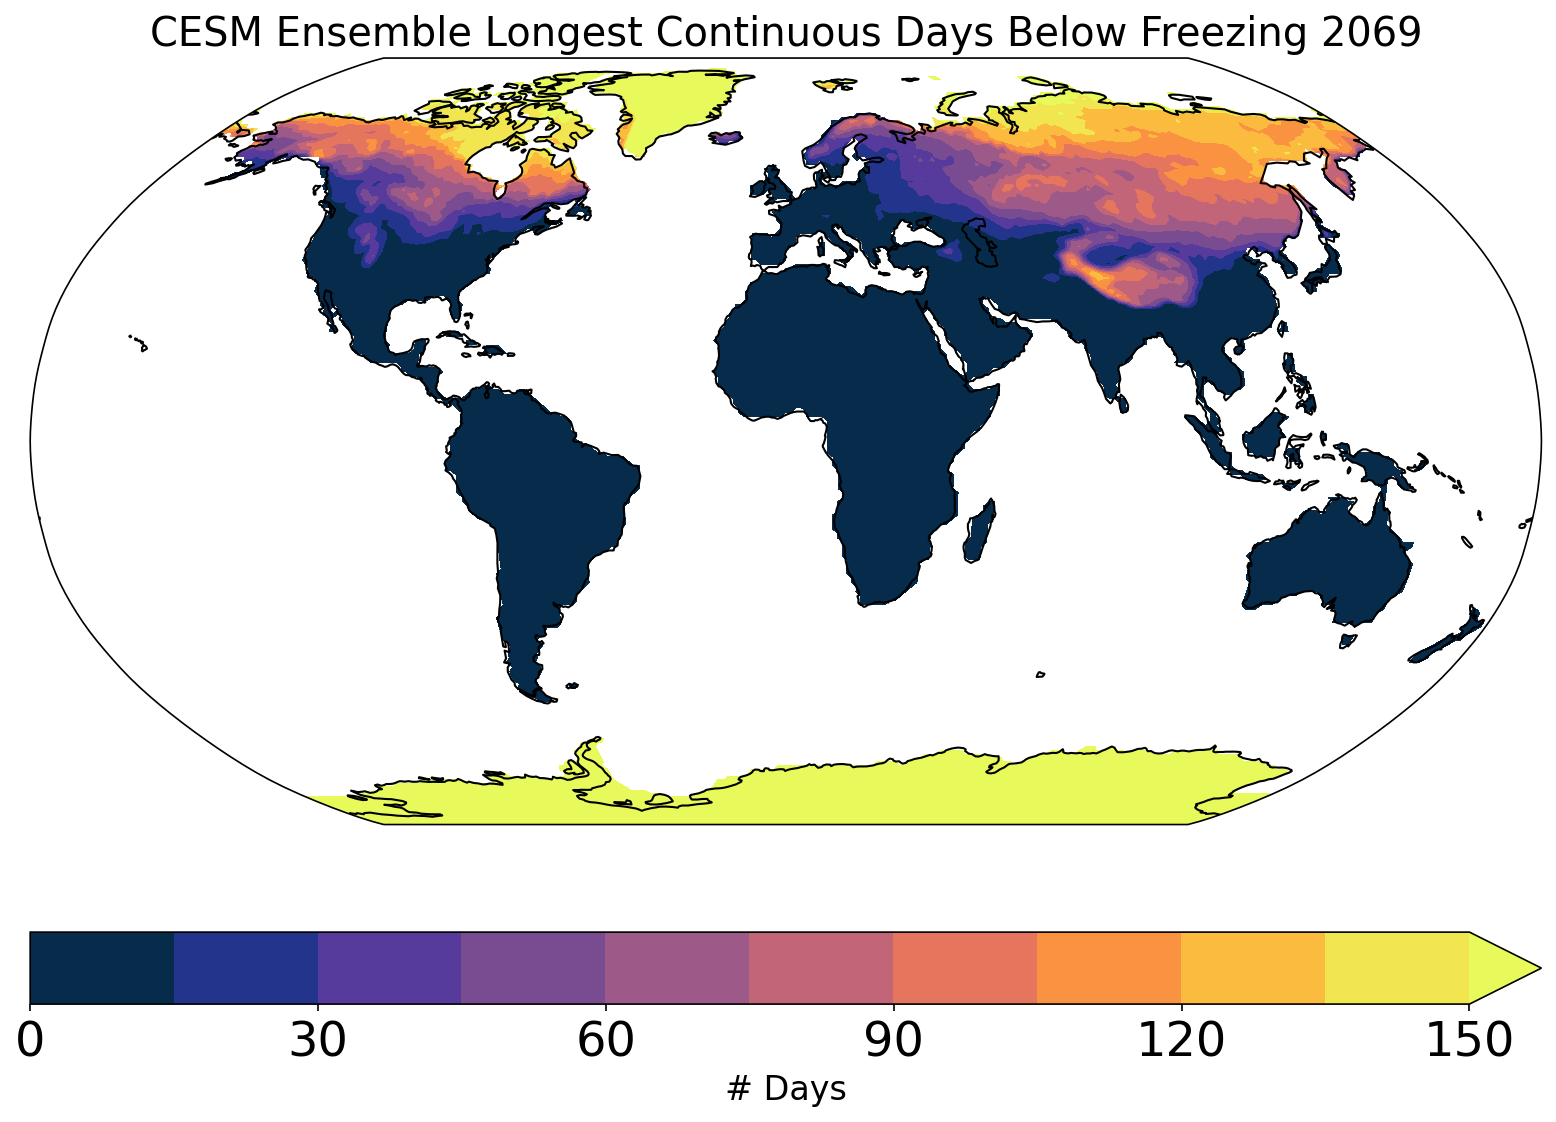

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


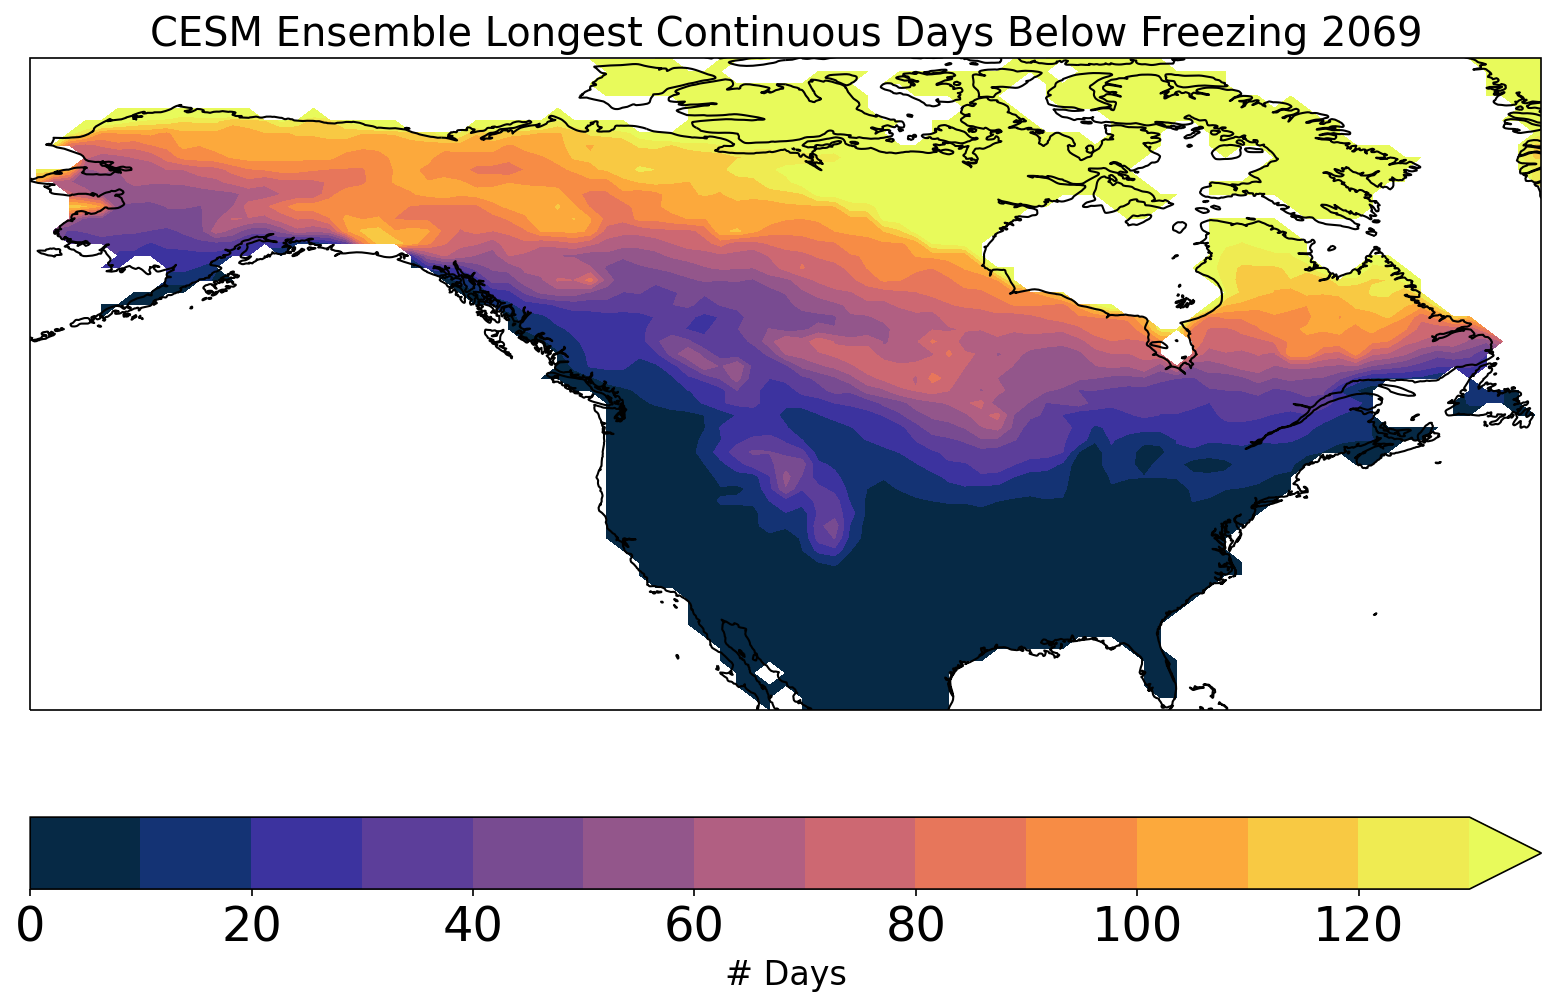

In [25]:
#Plotting: CESM 2069, longest days below freezing, global
x = lon
y = dataFile['lat']
plot =cesm_ts_2069_longest_days


fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0))) # defining a figure
title = 'CESM Ensemble Longest Continuous Days Below Freezing 2069'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_global()  

#plot the data
p = ax.contourf(x, y,
                plot,levels,extend='max', #plot the surface
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal)

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend = 'max') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('# Days')


plt.show() 
plt.close()

##################################################################################################################################
##################################################################################################################################

#Plotting: cesm, 2069, North america
x = lon
y = dataFile['lat']
plot =cesm_ts_2069_longest_days


fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0))) # defining a figure
title = 'CESM Ensemble Longest Continuous Days Below Freezing 2069'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_extent([-168,-52,25,75],crs=ccrs.PlateCarree() ) 

#plot the data
p = ax.contourf(x, y,
                plot,NA_levs,extend='max',#plot the surface
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal)

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend = 'max') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('# Days')

plt.show() 
plt.close()

In [26]:
NA_anom_levs = np.arange(-50,55,5)
anom_levs = np.arange(-40,45,5)

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


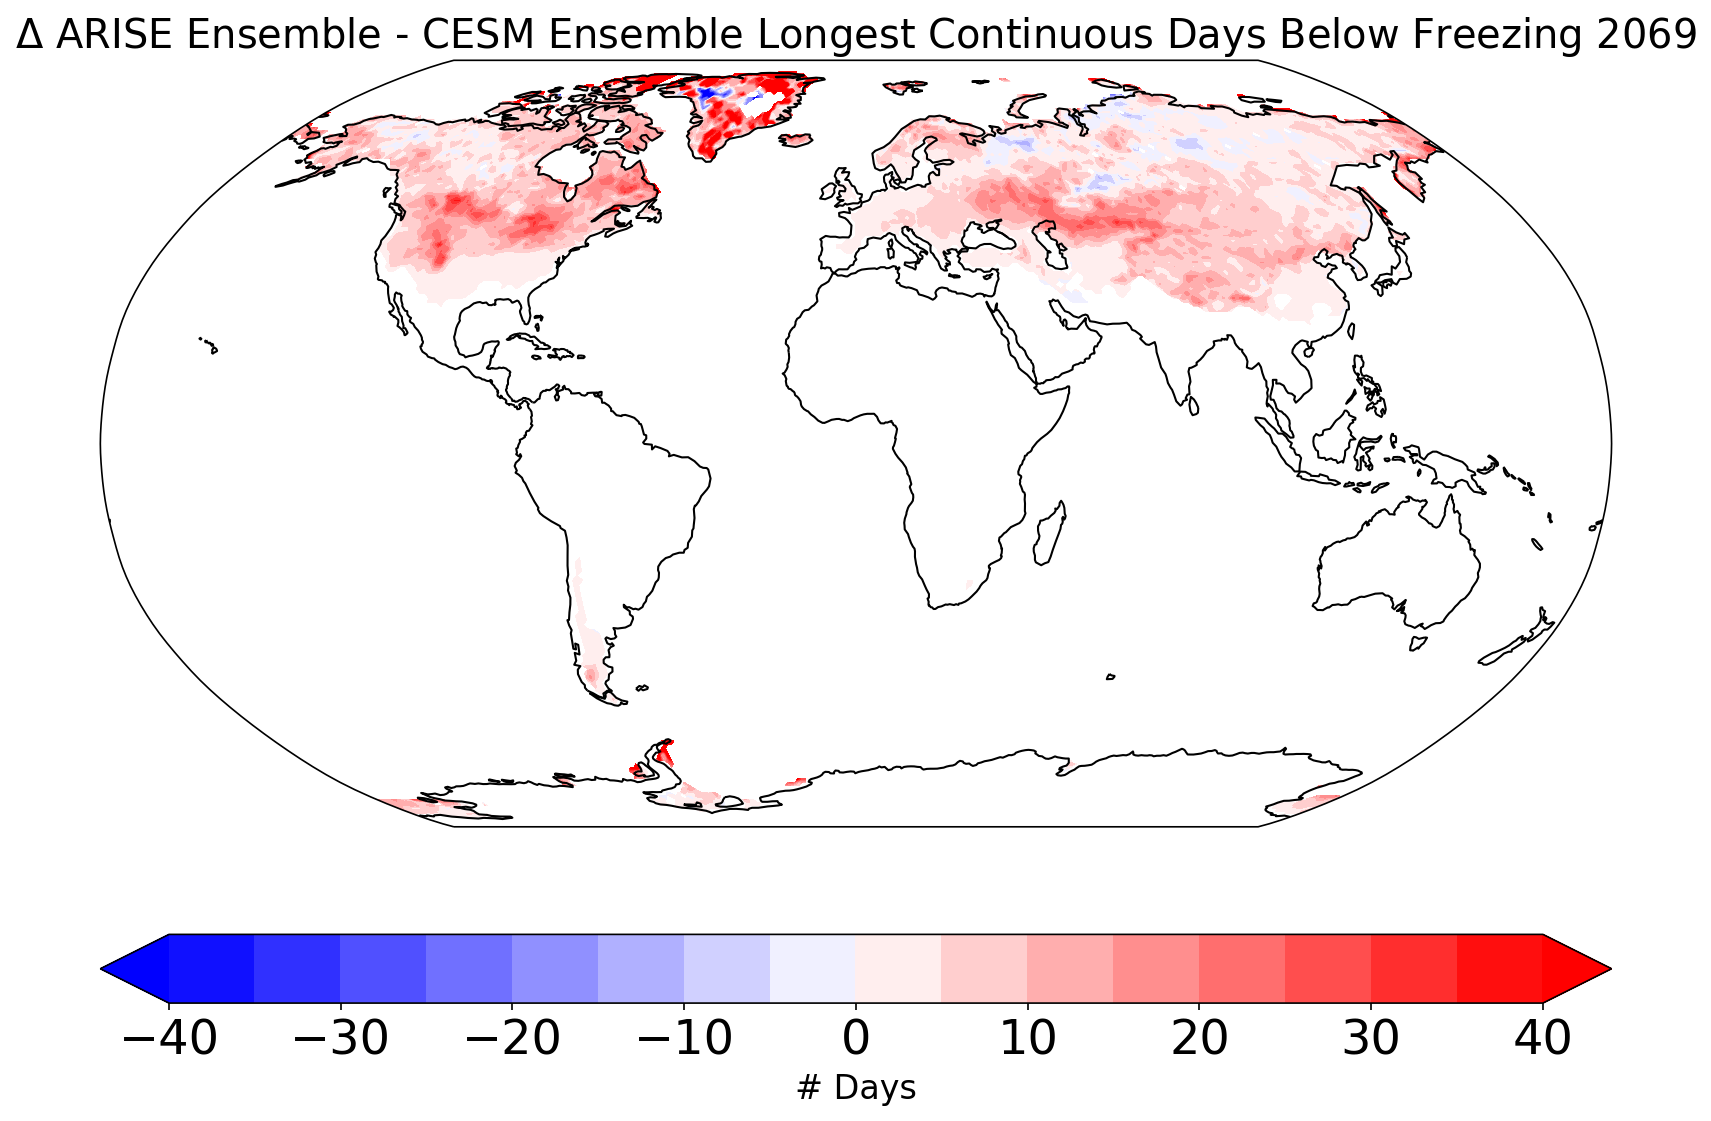

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


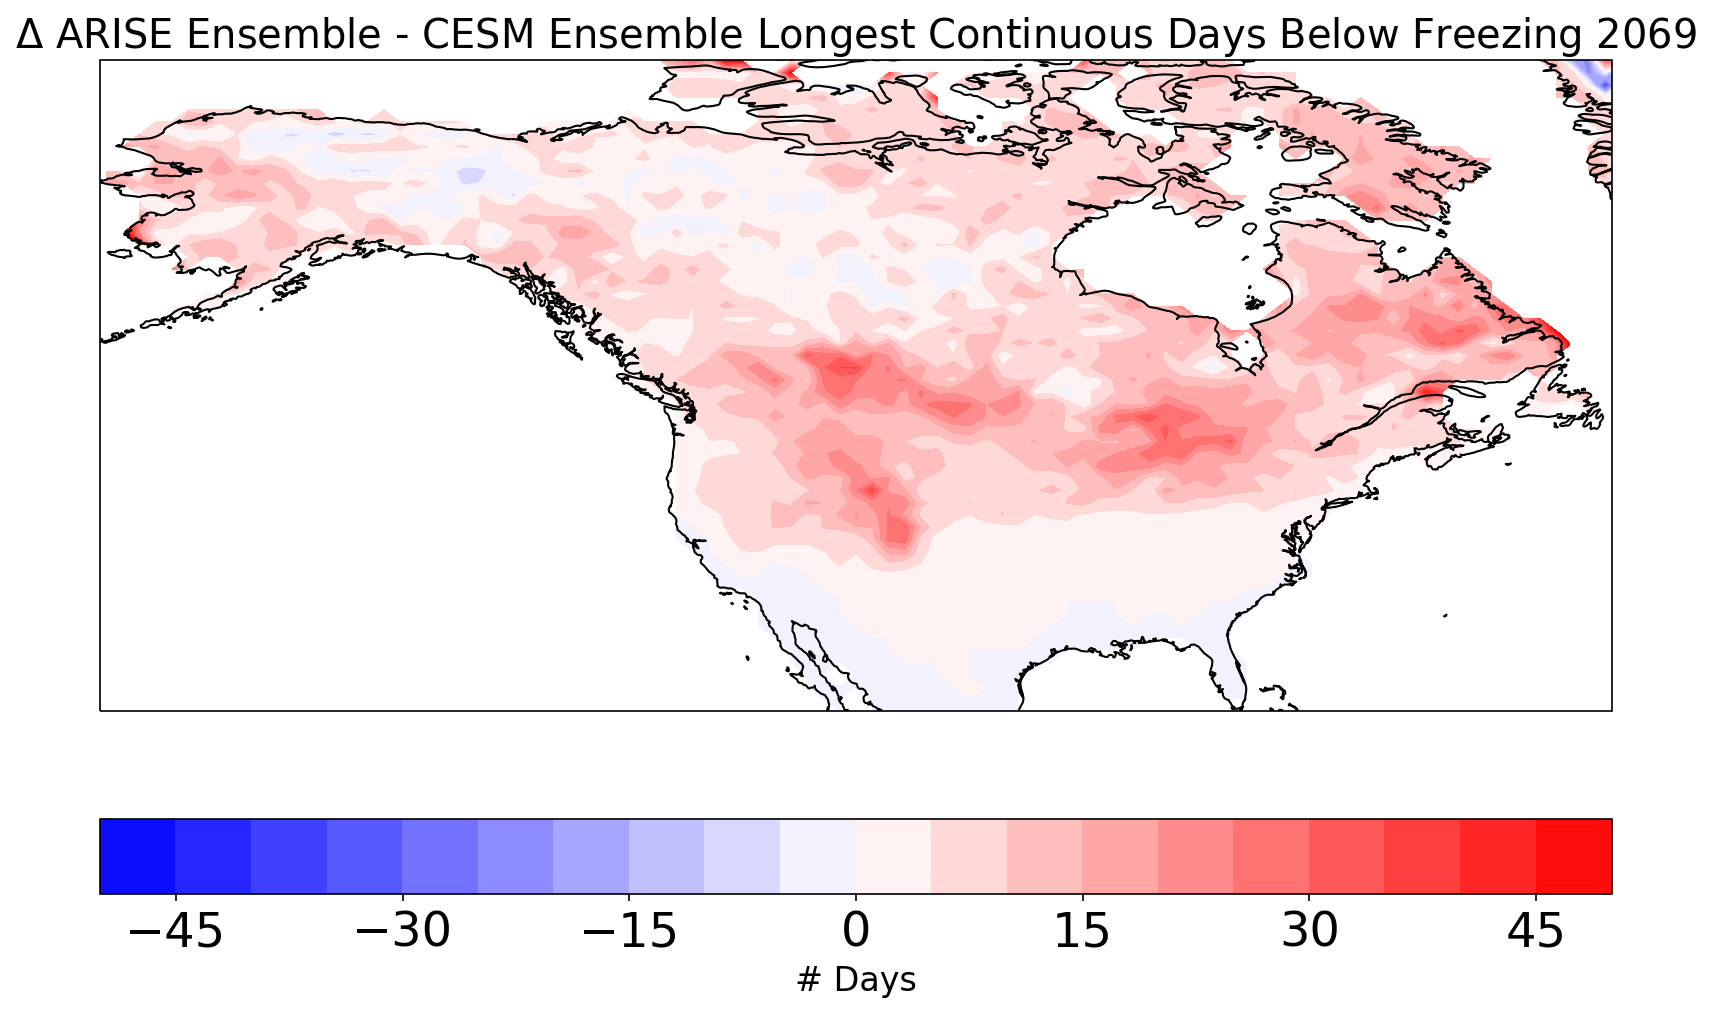

In [31]:
#Plotting Delta, arise-cesm 2069, global
x = lon
y = dataFile['lat']
plot = arise_ts_2069_longest_days - cesm_ts_2069_longest_days

plot[plot==0] = np.nan

fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0))) # defining a figure
title = '$\Delta$ ARISE Ensemble - CESM Ensemble Longest Continuous Days Below Freezing 2069'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_global()  

#plot the data
p = ax.contourf(x, y,
                plot,anom_levs,extend='both',#plot the surface
                transform=ccrs.PlateCarree(),cmap='bwr')

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend='both') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('# Days')


plt.show() 
plt.close()

##################################################################################################################################
##################################################################################################################################

#Plotting Delta arise-cesm, 2069, North America
x = lon
y = dataFile['lat']
plot = arise_ts_2069_longest_days - cesm_ts_2069_longest_days

fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0))) # defining a figure
title = '$\Delta$ ARISE Ensemble - CESM Ensemble Longest Continuous Days Below Freezing 2069'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_extent([-168,-52,25,75],crs=ccrs.PlateCarree() ) 

#plot the data
p = ax.contourf(x, y,
                plot, NA_anom_levs,extend='neither',#plot the surface
                transform=ccrs.PlateCarree(),cmap='bwr')

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend='both') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('# Days')


plt.show() 
plt.close()